# The Pandemic's Effect on Trends in Music: Exploration

Authors: Natnael Mekonnen, Sonya Lew, and Daniel Park

## Introduction

Why did we choose this topic? What is the importance?
Do we anticipate to be any changes?

## 1. Data Scraping

To explore the pandemic's effect on music, we chose to compare the COVID data in the US with the top 20 list on Spotify since January 2020. The COVID data will be extracted from the Atlantic's [The COVID Tracking Project](https://covidtracking.com/data/national) which has been constantly updating the data everyday with representatives from 50 states, 5 territories, and District of Colombia. On the other hand, the Spotify top 20 will be extracted from the [Spotify Charts](https://spotifycharts.com/) on a weekly starting from January 2020. The charts does not have a detail information on the song so we will get more detail by querying the Spotify API.  

Import the necessary libraries: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.1 Load and View COVID data

In [3]:
covid_data = pd.read_csv('national-history.csv')
covid_data.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-12-07,274745.0,1347,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14717065,180193,5714557.0,56,205934174,1835388
1,2020-12-06,273398.0,1146,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,3322.0,7095.0,14536872,177801,5624609.0,56,204098786,1648306
2,2020-12-05,272252.0,2461,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,3321.0,7006.0,14359071,212880,5576152.0,56,202450480,2190899
3,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
4,2020-12-03,267228.0,2706,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,3280.0,6867.0,13921360,210204,5404018.0,56,198404712,1828230


The COVID data is detailed but since this project is finding its relationship with music, most of the unnecessary columns will be dropped.

In [4]:
covid_data = covid_data.drop(['death','deathIncrease','inIcuCumulative','inIcuCurrently', 'hospitalizedIncrease','hospitalizedCurrently','hospitalizedCumulative','onVentilatorCumulative','onVentilatorCurrently','recovered','states'], axis=1)

Knowing that the Spotify data is grouped on a weekly basis starting on a Friday, the next step is to prepare the COVID data so it is easy to merge.

In [5]:
# Creating a custom interval index for grouping the data which starts from begining of the year on a Friday and continues weekly
i = pd.to_datetime('01/02/2020')
bins = []
while i < pd.to_datetime('12/12/2020'):
    temp = i + pd.Timedelta('7 days')
    bins.append((i,temp))
    i = temp
bins = pd.IntervalIndex.from_tuples(bins)

In [6]:
# Convert the date from the dataframe to a pandas date and time format to be comuted in the cutting
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Using the interval index created above, create a new column week which has the week interval of the data
covid_data['week'] = pd.cut(covid_data['date'], bins)

# Now that every row has a week interval, they will be grouped with the total for each column 
grouped_covid = covid_data.groupby(['week']).sum()

# Number the weeks to easily identify
grouped_covid['week#'] = list(range(1,len(bins)+1))

grouped_covid.head(10)

,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,week#
week,,,,,,,
"(2020-01-02, 2020-01-09]",0,0,0,0,0,0,1
"(2020-01-09, 2020-01-16]",0,0,0,0,0,0,2
"(2020-01-16, 2020-01-23]",0,0,0,0,3,1,3
"(2020-01-23, 2020-01-30]",0,0,0,0,22,3,4
"(2020-01-30, 2020-02-06]",0,0,0,0,81,11,5
"(2020-02-06, 2020-02-13]",0,0,0,0,134,6,6
"(2020-02-13, 2020-02-20]",0,0,0,0,205,14,7
"(2020-02-20, 2020-02-27]",0,0,0,0,6722,6451,8
"(2020-02-27, 2020-03-05]",4138,1943,953,367,50810,2376,9


In [7]:
column_names = ['week#','positiveIncrease','negativeIncrease','positive','negative','totalTestResultsIncrease','totalTestResults']
grouped_covid = grouped_covid.reindex(columns=column_names)

grouped_covid.head(10)

,week#,positiveIncrease,negativeIncrease,positive,negative,totalTestResultsIncrease,totalTestResults
week,,,,,,,
"(2020-01-02, 2020-01-09]",1,0,0,0,0,0,0
"(2020-01-09, 2020-01-16]",2,0,0,0,0,0,0
"(2020-01-16, 2020-01-23]",3,0,0,0,0,1,3
"(2020-01-23, 2020-01-30]",4,0,0,0,0,3,22
"(2020-01-30, 2020-02-06]",5,0,0,0,0,11,81
"(2020-02-06, 2020-02-13]",6,0,0,0,0,6,134
"(2020-02-13, 2020-02-20]",7,0,0,0,0,14,205
"(2020-02-20, 2020-02-27]",8,0,0,0,0,6451,6722
"(2020-02-27, 2020-03-05]",9,367,1943,953,4138,2376,50810


## 1.2 Load and View Spotify Top 20 Weekly Data

As mentioned above, the weekly Spotify top 10 list for 2020 has been downloaded as a csv file. However, since the data is not robust, the Spotify developer API was used to get more detail information on the songs and collectively stored under `data.csv`. The script to run this process is under `spotify_data_extraction.py`.

In [8]:
spotify_data = pd.read_csv('data.csv')
spotify_data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,start_date,end_date
0,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),Cardi B,2020-08-07,187541,95,0.935,0.01940,0.935,0.454,0.000,0.0824,-7.509,0.3750,133.073,4,2020-10-02,2020-10-09
1,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,140525,99,0.700,0.22100,0.700,0.722,0.000,0.2720,-3.558,0.0369,90.989,4,2020-10-02,2020-10-09
2,Runnin,SAVAGE MODE II,21 Savage,2020-10-02,195906,86,0.819,0.00748,0.819,0.626,0.101,0.1670,-4.574,0.2020,143.010,4,2020-10-02,2020-10-09
3,Mr. Right Now (feat. Drake),SAVAGE MODE II,21 Savage,2020-10-02,193838,85,0.647,0.23100,0.647,0.667,0.000,0.1330,-5.563,0.3040,172.080,4,2020-10-02,2020-10-09
4,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,94,0.823,0.11400,0.823,0.586,0.000,0.1930,-6.606,0.2000,125.971,4,2020-10-02,2020-10-09


In [9]:
spotify_data['start_date'] = pd.to_datetime(spotify_data['start_date'])

# Using the same interval index created for the covid_data, create a new column week which has the week interval
spotify_data['week'] = pd.cut(spotify_data['start_date'], bins)

# Now that week is included, we can reindex with only the columns we need
spotify_data = spotify_data.reindex(columns=['week','length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'])

spotify_data.head()

,week,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,"(2020-10-01, 2020-10-08]",187541,95,0.935,0.01940,0.935,0.454,0.000,0.0824,-7.509,0.3750,133.073,4
1,"(2020-10-01, 2020-10-08]",140525,99,0.700,0.22100,0.700,0.722,0.000,0.2720,-3.558,0.0369,90.989,4
2,"(2020-10-01, 2020-10-08]",195906,86,0.819,0.00748,0.819,0.626,0.101,0.1670,-4.574,0.2020,143.010,4
3,"(2020-10-01, 2020-10-08]",193838,85,0.647,0.23100,0.647,0.667,0.000,0.1330,-5.563,0.3040,172.080,4
4,"(2020-10-01, 2020-10-08]",190476,94,0.823,0.11400,0.823,0.586,0.000,0.1930,-6.606,0.2000,125.971,4


In [10]:
# Now that every row has a week interval, they will be grouped with the mean for each column 
grouped_spotify = spotify_data.groupby(['week']).mean()
grouped_spotify.head()

,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
week,,,,,,,,,,,,
"(2020-01-02, 2020-01-09]",190354.900,74.760,0.712345,0.237015,0.712345,0.581475,0.007063,0.168552,-6.609815,0.152529,121.291610,3.980
"(2020-01-09, 2020-01-16]",192795.995,72.765,0.721390,0.241026,0.721390,0.573710,0.007855,0.162825,-6.804815,0.152765,121.589780,3.975
"(2020-01-16, 2020-01-23]",194789.345,72.445,0.716780,0.223584,0.716780,0.569833,0.008466,0.175687,-6.900600,0.154397,122.389910,3.960
"(2020-01-23, 2020-01-30]",196103.895,74.935,0.715105,0.256937,0.715105,0.564088,0.011067,0.171447,-6.977350,0.152741,122.273920,3.965
"(2020-01-30, 2020-02-06]",191998.510,74.285,0.707205,0.247027,0.707205,0.574830,0.009474,0.169635,-6.684460,0.158517,121.311215,3.985


## 1.3 Merge the Spotify and Covid Data

In [11]:
merged = grouped_covid.merge(grouped_spotify, left_on='week', right_on='week')
merged.head()

,week#,positiveIncrease,negativeIncrease,positive,negative,totalTestResultsIncrease,totalTestResults,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
week,,,,,,,,,,,,,,,,,,,
"(2020-01-02, 2020-01-09]",1,0,0,0,0,0,0,190354.900,74.760,0.712345,0.237015,0.712345,0.581475,0.007063,0.168552,-6.609815,0.152529,121.291610,3.980
"(2020-01-09, 2020-01-16]",2,0,0,0,0,0,0,192795.995,72.765,0.721390,0.241026,0.721390,0.573710,0.007855,0.162825,-6.804815,0.152765,121.589780,3.975
"(2020-01-16, 2020-01-23]",3,0,0,0,0,1,3,194789.345,72.445,0.716780,0.223584,0.716780,0.569833,0.008466,0.175687,-6.900600,0.154397,122.389910,3.960
"(2020-01-23, 2020-01-30]",4,0,0,0,0,3,22,196103.895,74.935,0.715105,0.256937,0.715105,0.564088,0.011067,0.171447,-6.977350,0.152741,122.273920,3.965
"(2020-01-30, 2020-02-06]",5,0,0,0,0,11,81,191998.510,74.285,0.707205,0.247027,0.707205,0.574830,0.009474,0.169635,-6.684460,0.158517,121.311215,3.985


## 2. Data Analysis and Visualization

In [12]:
# In order to graph some variables from covid with spotify, they have to get normalized. In this case min-max normalization is used on negative increase
merged['norm_positive_i'] = (merged.positiveIncrease-merged.positiveIncrease.min())/(merged.positiveIncrease.max()-merged.positiveIncrease.min())

merged['norm_length'] = (merged.length-merged.length.min())/(merged.length.max()-merged.length.min())

merged['norm_tempo'] = (merged.tempo-merged.tempo.min())/(merged.tempo.max()-merged.tempo.min())
merged = merged[:48]

merged['norm_pop'] = (merged.tempo-merged.tempo.min())/(merged.tempo.max()-merged.tempo.min())
merged = merged[:48]

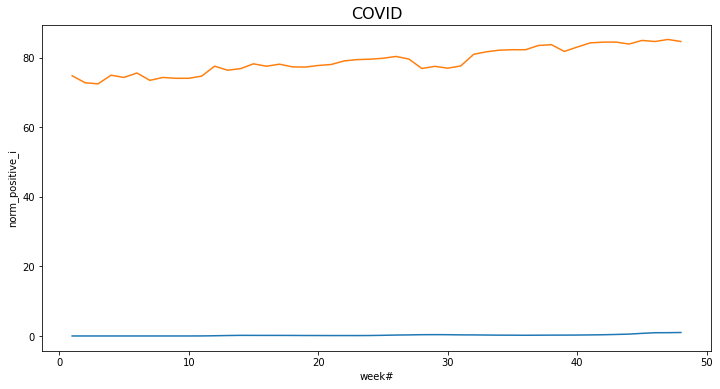

In [19]:
plt.figure(figsize=(12,6))
plt.title("COVID", fontsize=16)
sns.lineplot(data=merged, x='week#', y='norm_positive_i')
sns.lineplot(data=merged, x='week#', y='popularity')
# sns.lineplot(data=merged, x='week#', y='energy')
# sns.lineplot(data=merged, x='week#', y='norm_length')
# sns.lineplot(data=merged, x='week#', y='liveness')
# sns.lineplot(data=merged, x='week#', y='norm_tempo')
plt.show()

<AxesSubplot:>

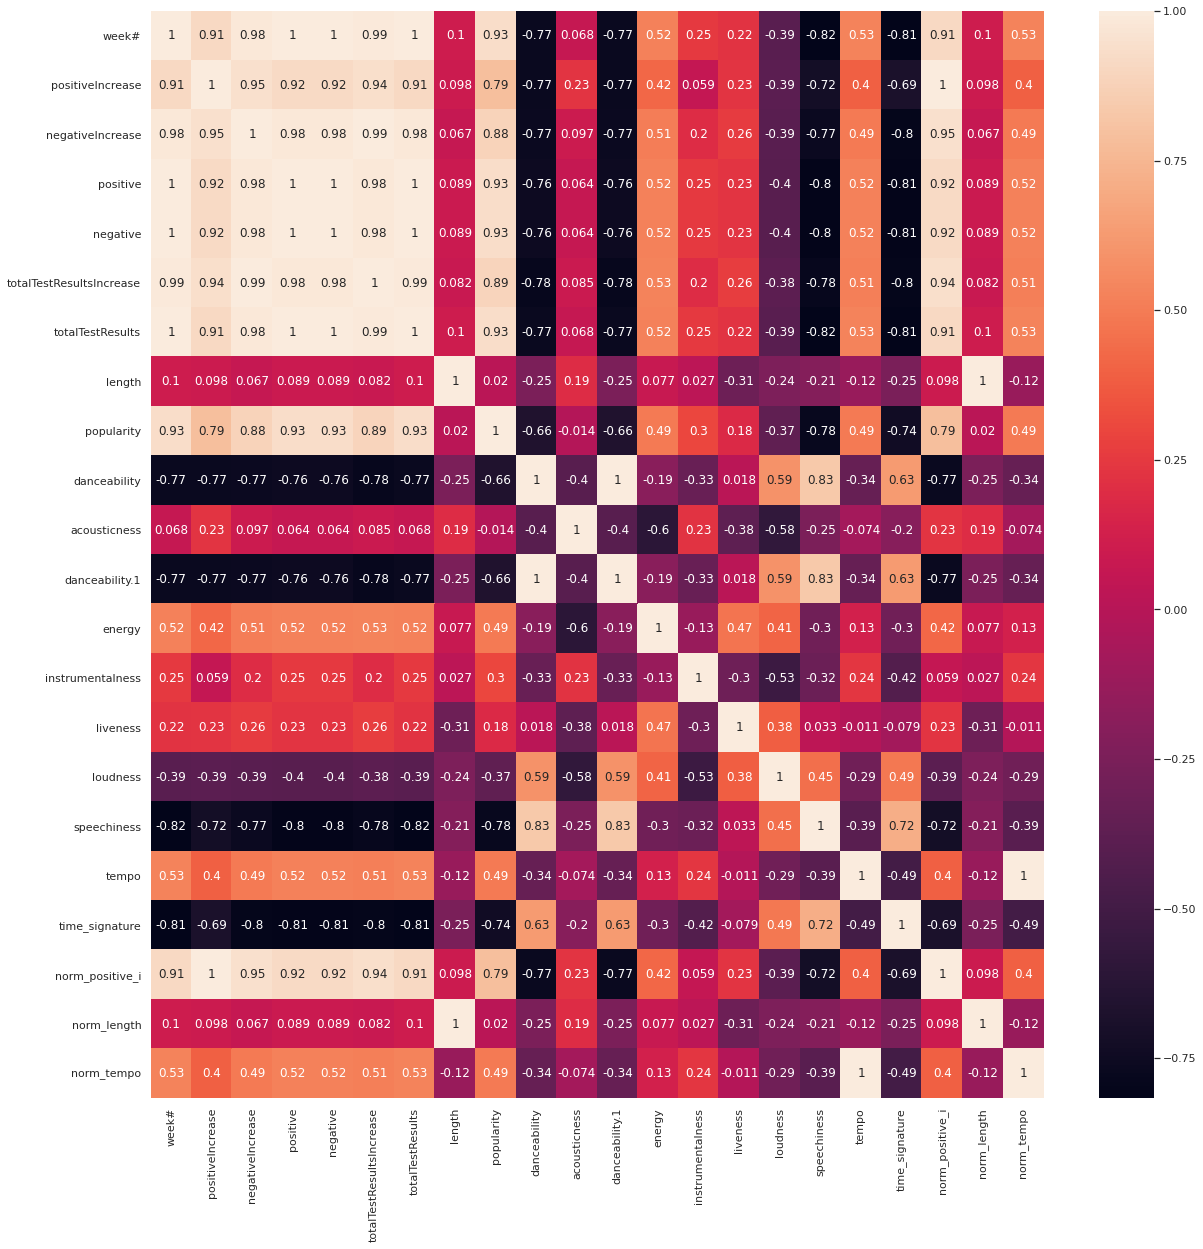

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(merged.corr(method="spearman"), annot=True)